In [91]:
from sklearn import datasets
from imblearn.over_sampling import SMOTE  # 选取少数类样本插值采样

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import numpy as np

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Task 1

## Task 1.1

In [92]:
X, y = datasets.load_wine(return_X_y=True)
print('wine',X.shape,y.shape)
smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_resample(X, y.astype('int'))
print('wine after SMOTE',X_smo.shape,y_smo.shape)

wine (178, 13) (178,)
wine after SMOTE (213, 13) (213,)


In [93]:
#决策树(Decision Trees)及贝叶斯分类器(Naive Bayes)

def metrics_dataset(clf, y_true, y_pred, cv):
    print(clf)
    #保留两位小数
    print('f1-score:', round(f1_score(y_true, y_pred, average='weighted'), 2))
    print('accuracy:', round(accuracy_score(y_true, y_pred), 2))
    print('precision:', round(precision_score(y_true, y_pred, average='weighted'), 2))
    print('recall:', round(recall_score(y_true, y_pred, average='weighted'), 2))
    print('cross_val_score:', round(cross_val_score(clf, X_smo, y_smo, cv=cv).mean(), 2))


#original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics_dataset(clf, y_test, y_pred, cv=5)
print('\n')
F1_score_original_decision_tree = round(f1_score(y_test, y_pred, average='weighted'), 2)
accuracy_score_original_decision_tree = round(accuracy_score(y_test, y_pred), 2)
precision_score_original_decision_tree = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_score_original_decision_tree = round(recall_score(y_test, y_pred, average='weighted'), 2)
cross_val_score_original_decision_tree = round(cross_val_score(clf, X_smo, y_smo, cv=5).mean(), 2)
#naive bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics_dataset(clf, y_test, y_pred, cv=5)
F1_score_original_naive_bayes = round(f1_score(y_test, y_pred, average='weighted'), 2)
accuracy_score_original_naive_bayes = round(accuracy_score(y_test, y_pred), 2)
precision_score_original_naive_bayes = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_score_original_naive_bayes = round(recall_score(y_test, y_pred, average='weighted'), 2)
cross_val_score_original_naive_bayes = round(cross_val_score(clf, X_smo, y_smo, cv=5).mean(), 2)

print('\n')
print('After SMOTE:')
#after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=0.3, random_state=42)
#decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics_dataset(clf, y_test, y_pred, cv=5)
F1_score_after_SMOTE_decision_tree = round(f1_score(y_test, y_pred, average='weighted'), 2)
accuracy_score_after_SMOTE_decision_tree = round(accuracy_score(y_test, y_pred), 2)
precision_score_after_SMOTE_decision_tree = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_score_after_SMOTE_decision_tree = round(recall_score(y_test, y_pred, average='weighted'), 2)
cross_val_score_after_SMOTE_decision_tree = round(cross_val_score(clf, X_smo, y_smo, cv=5).mean(), 2)
print('\n')
#naive bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics_dataset(clf, y_test, y_pred, cv=5)
F1_score_after_SMOTE_decision_tree = round(f1_score(y_test, y_pred, average='weighted'), 2)
accuracy_score_after_SMOTE_decision_tree = round(accuracy_score(y_test, y_pred), 2)
precision_score_after_SMOTE_decision_tree = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_score_after_SMOTE_decision_tree = round(recall_score(y_test, y_pred, average='weighted'), 2)
cross_val_score_after_SMOTE_decision_tree = round(cross_val_score(clf, X_smo, y_smo, cv=5).mean(), 2)


DecisionTreeClassifier(random_state=42)
f1-score: 0.96
accuracy: 0.96
precision: 0.96
recall: 0.96
cross_val_score: 0.93


GaussianNB()
f1-score: 1.0
accuracy: 1.0
precision: 1.0
recall: 1.0
cross_val_score: 0.98


After SMOTE:
DecisionTreeClassifier(random_state=42)
f1-score: 0.89
accuracy: 0.89
precision: 0.9
recall: 0.89
cross_val_score: 0.93


GaussianNB()
f1-score: 0.95
accuracy: 0.95
precision: 0.95
recall: 0.95
cross_val_score: 0.98


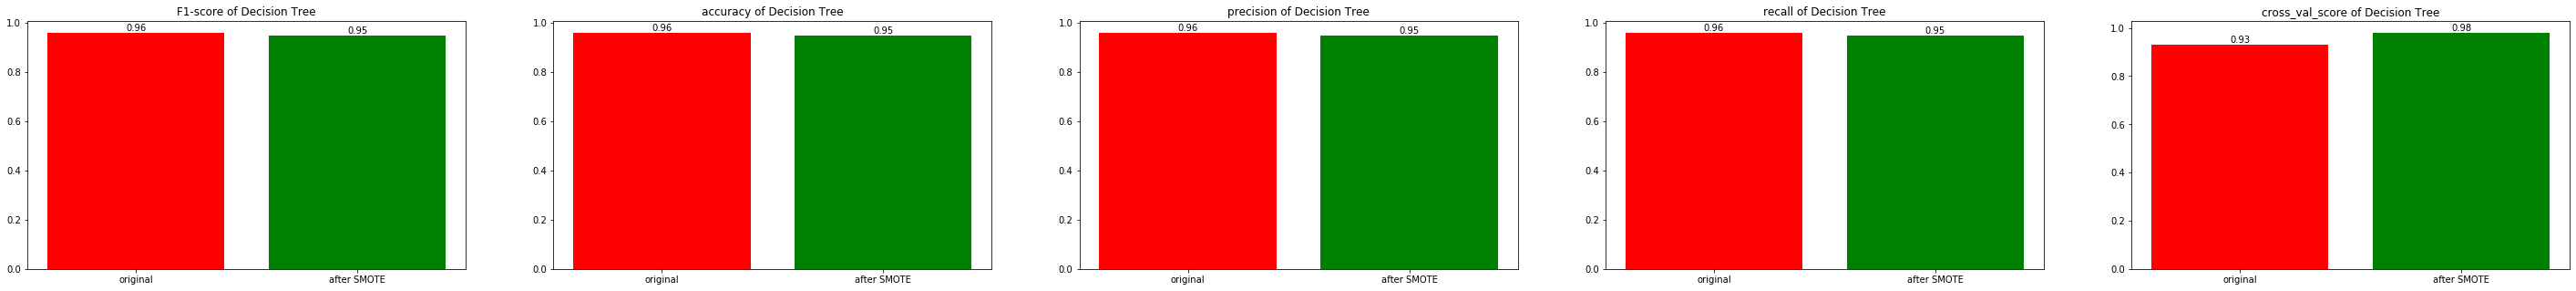

In [94]:
plt.figure(figsize=(50, 5))
plt.subplot(1, 5, 1)
plt.bar(['original', 'after SMOTE'], [F1_score_original_decision_tree, F1_score_after_SMOTE_decision_tree], color=['red', 'green'])
for a, b in zip(['original', 'after SMOTE'], [F1_score_original_decision_tree, F1_score_after_SMOTE_decision_tree]):
    plt.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=10)
plt.title('F1-score of Decision Tree')
plt.subplot(1, 5, 2)
plt.bar(['original', 'after SMOTE'], [accuracy_score_original_decision_tree, accuracy_score_after_SMOTE_decision_tree], color=['red', 'green'])
for a, b in zip(['original', 'after SMOTE'], [accuracy_score_original_decision_tree, accuracy_score_after_SMOTE_decision_tree]):
    plt.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=10)
plt.title('accuracy of Decision Tree')
plt.subplot(1, 5, 3)
plt.bar(['original', 'after SMOTE'], [precision_score_original_decision_tree, precision_score_after_SMOTE_decision_tree], color=['red', 'green'])
for a, b in zip(['original', 'after SMOTE'], [precision_score_original_decision_tree, precision_score_after_SMOTE_decision_tree]):
    plt.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=10)
plt.title('precision of Decision Tree')
plt.subplot(1, 5, 4)
plt.bar(['original', 'after SMOTE'], [recall_score_original_decision_tree, recall_score_after_SMOTE_decision_tree], color=['red', 'green'])
for a, b in zip(['original', 'after SMOTE'], [recall_score_original_decision_tree, recall_score_after_SMOTE_decision_tree]):
    plt.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=10)
plt.title('recall of Decision Tree')
plt.subplot(1, 5, 5)
plt.bar(['original', 'after SMOTE'], [cross_val_score_original_decision_tree, cross_val_score_after_SMOTE_decision_tree], color=['red', 'green'])
for a, b in zip(['original', 'after SMOTE'], [cross_val_score_original_decision_tree, cross_val_score_after_SMOTE_decision_tree]):
    plt.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=10)
plt.title('cross_val_score of Decision Tree')

plt.show()

## Task 1.2

In [95]:
# breast cancer for classification(2 classes)
X, y = datasets.load_breast_cancer(return_X_y=True)
print('cancer', X.shape, y.shape)

smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_resample(X, y.astype('int'))
print('cancer after SMOTE', X_smo.shape, y_smo.shape)

cancer (569, 30) (569,)
cancer after SMOTE (714, 30) (714,)


In [96]:
#决策树(Decision Trees)及贝叶斯分类器(Naive Bayes)

def metrics_dataset(clf, y_true, y_pred, cv):
    print(clf)
    #保留两位小数
    print('f1-score:', round(f1_score(y_true, y_pred, average='weighted'), 2))
    print('accuracy:', round(accuracy_score(y_true, y_pred), 2))
    print('precision:', round(precision_score(y_true, y_pred, average='weighted'), 2))
    print('recall:', round(recall_score(y_true, y_pred, average='weighted'), 2))
    print('cross_val_score:', round(cross_val_score(clf, X_smo, y_smo, cv=cv).mean(), 2))


#original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics_dataset(clf, y_test, y_pred, cv=5)
F1_score_original_decision_tree = round(f1_score(y_test, y_pred, average='weighted'), 2)
accuracy_score_original_decision_tree = round(accuracy_score(y_test, y_pred), 2)
precision_score_original_decision_tree = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_score_original_decision_tree = round(recall_score(y_test, y_pred, average='weighted'), 2)
cross_val_score_original_decision_tree = round(cross_val_score(clf, X_smo, y_smo, cv=5).mean(), 2)

print('\n')
#naive bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics_dataset(clf, y_test, y_pred, cv=5)
F1_score_original_naive_bayes = round(f1_score(y_test, y_pred, average='weighted'), 2)
accuracy_score_original_naive_bayes = round(accuracy_score(y_test, y_pred), 2)
precision_score_original_naive_bayes = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_score_original_naive_bayes = round(recall_score(y_test, y_pred, average='weighted'), 2)
cross_val_score_original_naive_bayes = round(cross_val_score(clf, X_smo, y_smo, cv=5).mean(), 2)

#after SMOTE
print('\n')
print('After SMOTE:')
X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=0.3, random_state=42)
#decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics_dataset(clf, y_test, y_pred, cv=5)
F1_score_after_SMOTE_decision_tree = round(f1_score(y_test, y_pred, average='weighted'), 2)
accuracy_score_after_SMOTE_decision_tree = round(accuracy_score(y_test, y_pred), 2)
precision_score_after_SMOTE_decision_tree = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_score_after_SMOTE_decision_tree = round(recall_score(y_test, y_pred, average='weighted'), 2)
cross_val_score_after_SMOTE_decision_tree = round(cross_val_score(clf, X_smo, y_smo, cv=5).mean(), 2)

print('\n')
#naive bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics_dataset(clf, y_test, y_pred, cv=5)
F1_score_after_SMOTE_naive_bayes = round(f1_score(y_test, y_pred, average='weighted'), 2)
accuracy_score_after_SMOTE_naive_bayes = round(accuracy_score(y_test, y_pred), 2)
precision_score_after_SMOTE_naive_bayes = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_score_after_SMOTE_naive_bayes = round(recall_score(y_test, y_pred, average='weighted'), 2)
cross_val_score_after_SMOTE_naive_bayes = round(cross_val_score(clf, X_smo, y_smo, cv=5).mean(), 2)




DecisionTreeClassifier(random_state=42)
f1-score: 0.94
accuracy: 0.94
precision: 0.94
recall: 0.94
cross_val_score: 0.94


GaussianNB()
f1-score: 0.94
accuracy: 0.94
precision: 0.94
recall: 0.94
cross_val_score: 0.93


After SMOTE:
DecisionTreeClassifier(random_state=42)
f1-score: 0.93
accuracy: 0.93
precision: 0.93
recall: 0.93
cross_val_score: 0.94


GaussianNB()
f1-score: 0.94
accuracy: 0.94
precision: 0.94
recall: 0.94
cross_val_score: 0.93


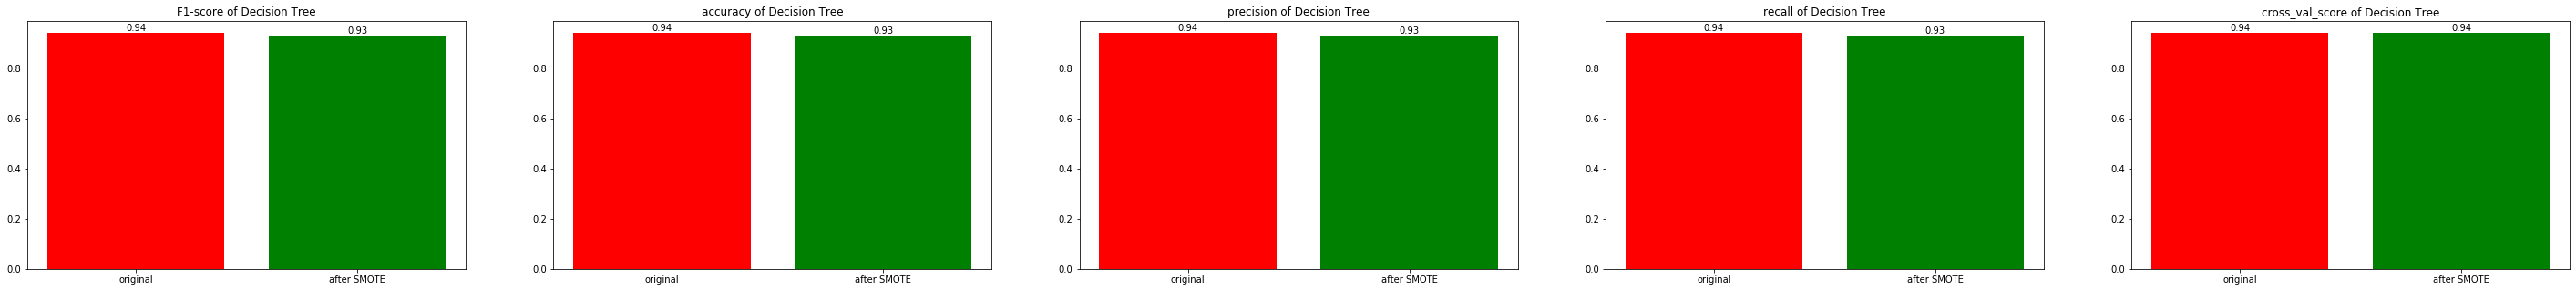

In [97]:

plt.figure(figsize=(50, 5))
plt.subplot(1, 5, 1)
plt.bar(['original', 'after SMOTE'], [F1_score_original_decision_tree, F1_score_after_SMOTE_decision_tree], color=['red', 'green'])
for a, b in zip(['original', 'after SMOTE'], [F1_score_original_decision_tree, F1_score_after_SMOTE_decision_tree]):
    plt.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=10)
plt.title('F1-score of Decision Tree')
plt.subplot(1, 5, 2)
plt.bar(['original', 'after SMOTE'], [accuracy_score_original_decision_tree, accuracy_score_after_SMOTE_decision_tree], color=['red', 'green'])
for a, b in zip(['original', 'after SMOTE'], [accuracy_score_original_decision_tree, accuracy_score_after_SMOTE_decision_tree]):
    plt.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=10)
plt.title('accuracy of Decision Tree')
plt.subplot(1, 5, 3)
plt.bar(['original', 'after SMOTE'], [precision_score_original_decision_tree, precision_score_after_SMOTE_decision_tree], color=['red', 'green'])
for a, b in zip(['original', 'after SMOTE'], [precision_score_original_decision_tree, precision_score_after_SMOTE_decision_tree]):
    plt.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=10)
plt.title('precision of Decision Tree')
plt.subplot(1, 5, 4)
plt.bar(['original', 'after SMOTE'], [recall_score_original_decision_tree, recall_score_after_SMOTE_decision_tree], color=['red', 'green'])
for a, b in zip(['original', 'after SMOTE'], [recall_score_original_decision_tree, recall_score_after_SMOTE_decision_tree]):
    plt.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=10)
plt.title('recall of Decision Tree')
plt.subplot(1, 5, 5)
plt.bar(['original', 'after SMOTE'], [cross_val_score_original_decision_tree, cross_val_score_after_SMOTE_decision_tree], color=['red', 'green'])
for a, b in zip(['original', 'after SMOTE'], [cross_val_score_original_decision_tree, cross_val_score_after_SMOTE_decision_tree]):
    plt.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=10)
plt.title('cross_val_score of Decision Tree')

plt.show()



# Task 2

## Task 2.1

In [98]:
X, y = datasets.load_boston(return_X_y=True)
print('boston',X.shape,y.shape)

boston (506, 13) (506,)


In [99]:
#多变量线性模型拟合数据，并计算测试集的平方误差和的平均值(用5折交叉验证)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) 
print('cross_val_score:', round(cross_val_score(lr, X_test, y_test, cv=5).mean(), 2))

cross_val_score: 0.59


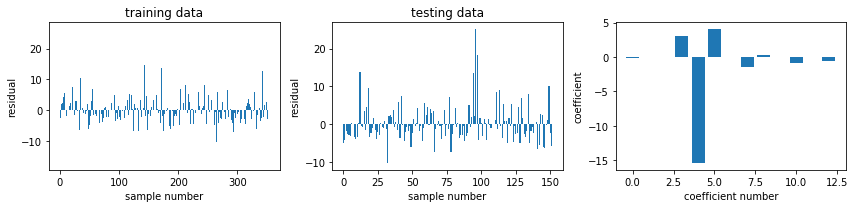

In [100]:
resid_train = y_train - lr.predict(X_train)
resid_test = y_test - lr.predict(X_test)
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, lr.coef_)
plt.show()

In [101]:
#多变量线性模型拟合数据，但使用 L2 正则项，重复上项实验 关于参数 要进行多个参数的设置实验，并就有无正则项比较平方误差和的平均值(用图表列出)

ridge = Ridge(alpha=2.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('cross_val_score:', round(cross_val_score(ridge, X_test, y_test, cv=5).mean(), 2))

cross_val_score: 0.6


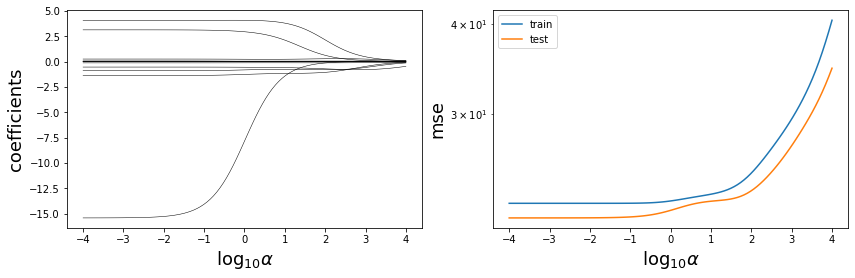

In [102]:
alphas = np.logspace(-4, 4, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
mse_train = np.zeros_like(alphas)
mse_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    mse_train[n] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[n] = mean_squared_error(y_test, model.predict(X_test))

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)
for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), mse_train, label="train")
axes[1].semilogy(np.log10(alphas), mse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"mse", fontsize=18)
plt.show()

## Task 2.2

In [103]:
X, y = datasets.load_diabetes(return_X_y=True)
print('diabetes',X.shape,y.shape)

diabetes (442, 10) (442,)


In [104]:
#多变量线性模型拟合数据，并计算测试集的平方误差和的平均值(用5折交叉验证)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) 
print('cross_val_score:', round(cross_val_score(lr, X_test, y_test, cv=5).mean(), 2))

cross_val_score: 0.36


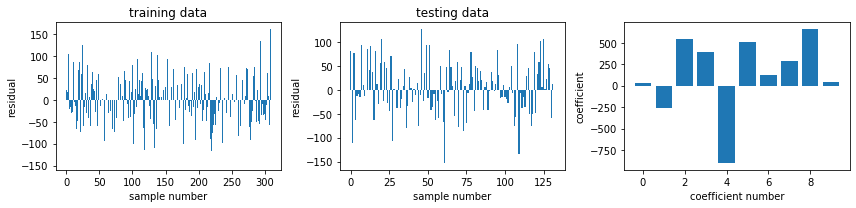

In [105]:
resid_train = y_train - lr.predict(X_train)
resid_test = y_test - lr.predict(X_test)
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, lr.coef_)
plt.show()

In [106]:
#多变量线性模型拟合数据，但使用 L2 正则项，重复上项实验。关于参数要进行多个参数的设置实验，并就有无正则项比较平方误差和的平均值(用图表列出)

ridge = Ridge(alpha=2.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('cross_val_score:', round(cross_val_score(ridge, X_test, y_test, cv=5).mean(), 2))

cross_val_score: 0.09


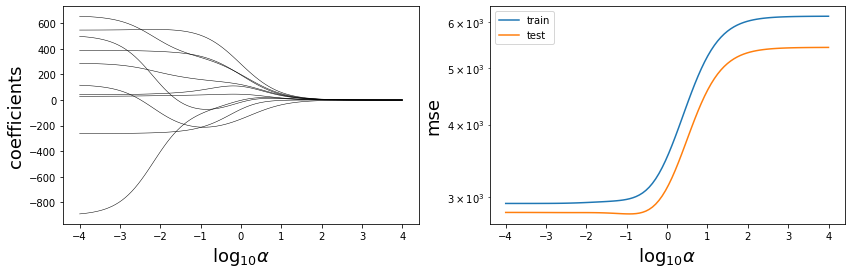

In [107]:
alphas = np.logspace(-4, 4, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
mse_train = np.zeros_like(alphas)
mse_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    mse_train[n] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[n] = mean_squared_error(y_test, model.predict(X_test))
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)
for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), mse_train, label="train")
axes[1].semilogy(np.log10(alphas), mse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"mse", fontsize=18)
plt.show()